## Description
Jeu de données constitué de données normales et 1% de données anormales

Données normales :
- Données aléatoire gaussienne
- mu = 0, sigma = 1, size = 1500

Données anormales :
- Données aléatoire gaussienne
- mu = 5, sigma = 1, size = 15

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

## Paramètres de jeu de données

In [2]:
param_y_normal_data = 1
param_y_abnormal_data = 0
contamination = 1/100 # 1%
file_name = "synthetic_1D_data_"+str(datetime.now())
#full_file_path = str(datetime.now().date())+"/"+file_name+".csv"
full_file_path = file_name+".csv"

## Normal gaussian dataset generation

In [3]:
#Normal gaussian dataset
mu = 0 #mean
sigma = 1 #Standard deviation
size = 1500 #number of samples
n_dataset = np.random.normal(mu, sigma, size)
y_n_dataset = []
i = 0
while i<size:
    y_n_dataset.append(param_y_normal_data)
    i = i + 1
n_dataset

array([-0.78425855,  0.78844788, -2.00872511, ..., -0.24491301,
       -1.11002301,  0.30279238])

In [4]:
abs(mu - np.mean(n_dataset))

0.01857620373767765

In [5]:
abs(sigma - np.std(n_dataset, ddof=1))

0.01590066171748672

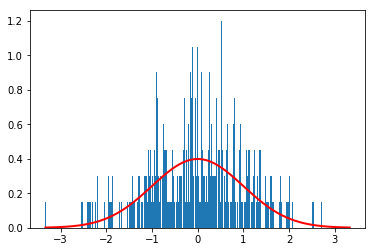

In [6]:
count, bins, ignored = plt.hist(n_dataset, size, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2)), linewidth=2, color='r')
plt.show()

## Abnormal gaussian dataset generation

In [7]:
#Abnormal gaussian dataset
mu_a = 5 #mean
sigma_a = 1 #Standard deviation
size_a = int(size*contamination) #size of samples
a_dataset = np.random.normal(mu_a, sigma_a, size_a)
y_a_dataset = []
i = 0
while i<size_a:
    y_a_dataset.append(param_y_abnormal_data)
    i = i + 1
a_dataset

array([5.66894908, 5.74974303, 6.20737149, 4.55979157, 3.32525652,
       3.6894722 , 5.41959515, 4.81398276, 5.41546463, 3.50555779,
       6.25641032, 5.25118106, 6.86788306, 5.51693827, 4.27801179])

In [8]:
size_a

15

In [9]:
abs(mu_a - np.mean(a_dataset))

0.10170724921012653

In [10]:
abs(sigma_a - np.std(a_dataset, ddof=1))

0.05437825839035737

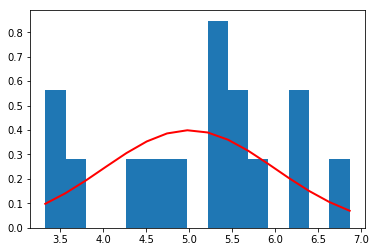

In [11]:
count_a, bins_a, ignored_a = plt.hist(a_dataset, size_a, density=True)
plt.plot(bins_a, 1/(sigma_a * np.sqrt(2 * np.pi)) * np.exp( - (bins_a - mu_a)**2 / (2 * sigma_a**2)), linewidth=2, color='r')
plt.show()

## Génération du jeu de données complet

In [12]:
x_dataset = np.concatenate((n_dataset, a_dataset))
y_dataset = np.concatenate((y_n_dataset, y_a_dataset))
data_array = {'0': x_dataset, 'is_normal': y_dataset}
dataset = pd.DataFrame(data_array, columns=['0', 'is_normal'])
dataset

,0,is_normal
0,-0.784259,1
1,0.788448,1
2,-2.008725,1
3,-0.168597,1
4,-1.344871,1
5,-1.238408,1
6,-0.415356,1
7,-3.125944,1
8,0.839305,1
9,-1.711120,1


In [13]:
dataset.describe()

,0,is_normal
count,1515.000000,1515.000000
mean,0.032120,0.990099
std,1.107390,0.099043
min,-3.334118,0.000000
25%,-0.692972,1.000000
50%,-0.034196,1.000000
75%,0.650968,1.000000
max,6.867883,1.000000


## Créé le fichier .csv du jeu de données

In [14]:
dataset.to_csv(full_file_path, index=None, header=True)

In [15]:
# Les données anormales et normales doivent-elles se rejoindre?